# Движение машинки вдоль заданной траектории
Общая идея: 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from math import  sqrt, atan2, pi, sin, cos, copysign

In [3]:
def init_plot():
    ax = plt.gca()
    ax.set_aspect('equal')
    ax.grid(True)    
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')

def line(a, b, style=''):
    plt.plot([a[0], b[0]], [a[1], b[1]], style)
    
def circle(xy, r):
    circle = plt.Circle(xy, r, fill=False)
    plt.gca().add_artist(circle)

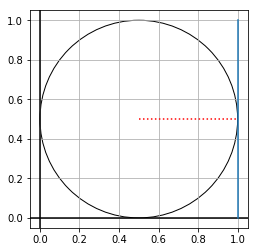

In [7]:
def norm(vec):
    return vec / np.linalg.norm(vec)

# проверяет, что точка на прямой лежит в пределах отрезка
# a - точка
# A, B - границы отрезка
def check_bounds(p, A, B):
    x1 = min(A[0], B[0])
    x2 = max(A[0], B[0])
    y1 = min(A[1], B[1])
    y2 = max(A[1], B[1])
    
    return p[0] >= x1 and p[0] <= x2 and p[1] >= y1 and p[1] <= y2

# Нахождение точек пересечения между окружностью и отрезком
# p1,p2  - границы отрезка
# O      - центр окружности
# r      - радиус окружности
# eps    - точность проверки 
def find_intersections(p1, p2, O, r, eps):
    # прямая представлена в виде
    # (x - p1.x)/(p2.x - p1.x) = (y - p1.y)/(p2.y - p1.y)
    # представим ее в виде
    # ax + by + c = 0
    px = p2[0] - p1[0]
    py = p2[1] - p1[1]
    a = py
    b = -px
    c = px*p1[1] - py*p1[0]        
    
    x0 = O[0]
    y0 = O[1]
    
    # расстояние от центра окружности (точка O) до прямой
    d = abs(a*x0 + b*y0 + c)/sqrt(a*a + b*b)    
    
    # координаты ближайшей к центру точки на прямой (точка C)
    x = (b*(b*x0 - a*y0) - a*c)/(a*a + b*b)
    y = (a*(-b*x0 + a*y0) - b*c)/(a*a + b*b)
    
        
    if abs(d-r) < eps:
        # Одно пересечение
        return [[x, y]]
    
    if d > r:
        # Пересечений нет
        return []
    
    # иначе 2 пересечение
    
    # Расстояние от точки D до точек пересечения (A, B)
    # (одинаково в обе стороны)
    l = sqrt(r*r - d*d)
    
    # Отложим расстояние l от точки C вдоль и против нормированного направляющего вектора
    # прямой p(px, py):
    p = norm([px, py])
    C = [x, y]
    A = C - l*p
    B = C + l*p    
        
    # Проверка границ отрезка
    points = []
    if check_bounds(A, p1, p2):
        points.append(A)
        
    if check_bounds(B, p1, p2):
        points.append(B)        
    
    return points

init_plot()

p1 = [1, 0]
p2 = [1, 1]
O = [0.5, 0.5]
r = 0.5

line(p1, p2)
circle(O, r)

points = find_intersections(p1, p2, O, r, 0.01)
for p in points:
    line(O, p, 'r:')

Пересечение отрезка и окружности


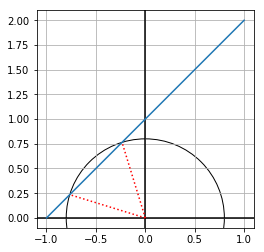

In [44]:
print('Пересечение отрезка и окружности')
init_plot()
p1 = [-1, 0]
p2 = [1, 2]
O = [0, 0]
r = 0.8

line(p1, p2)
circle(O, r)

points = find_intersections(p1, p2, O, r, 0.001)
for p in points:
    line(O, p, 'r:')

In [45]:
# Нахождение точек пересечения между окружностью и ломаной, заданной
# последовательностью точек
# points - точки ломаной
# O      - центр окружности
# r      - радиус окружности
# eps    - точность проверки 
def find_path_intersections(points, O, r, eps):        
    intersetcs = []
    for i in range(len(points)-1):
        line(points[i], points[i+1])
        p = find_intersections(points[i], points[i+1], O, r, eps)
        intersetcs.extend(p)
    
    return intersetcs

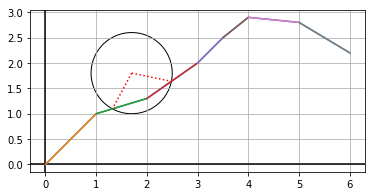

In [46]:
p = np.array([[0, 0], [1,1], [2, 1.3], [3,2], [3.5,2.5], [4, 2.9], [5, 2.8], [6,2.2]])
O = [1.7, 1.8]
r = 0.8

init_plot()
plt.plot(p[:,0], p[:,1])
circle(O, r)

points = find_path_intersections(p, O, r, 0.01)
for p in points:
    line(O, p, 'r:')

plt.show()

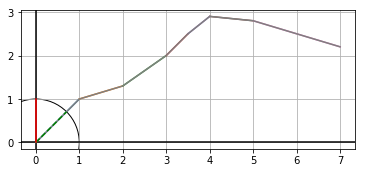

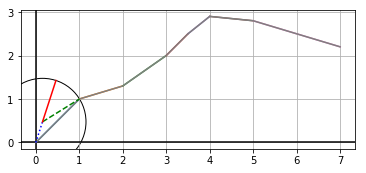

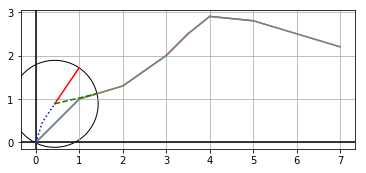

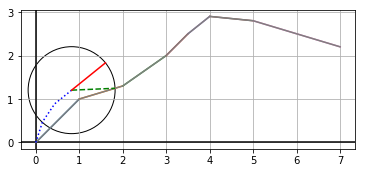

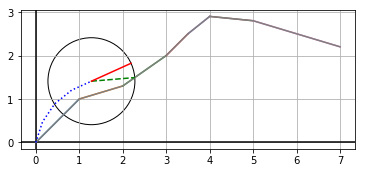

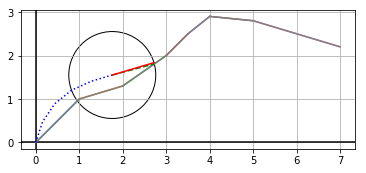

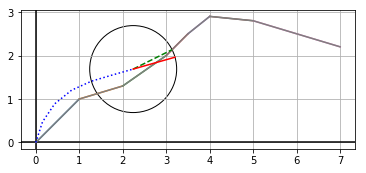

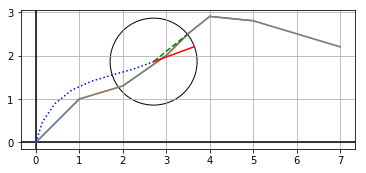

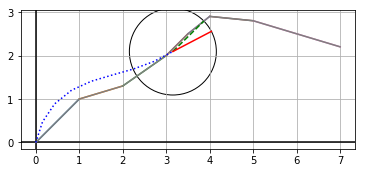

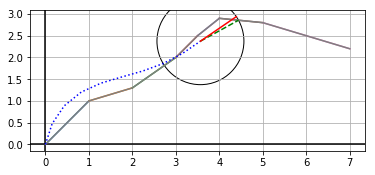

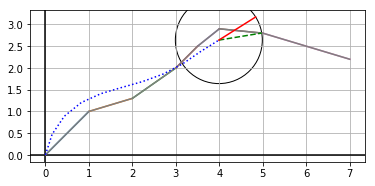

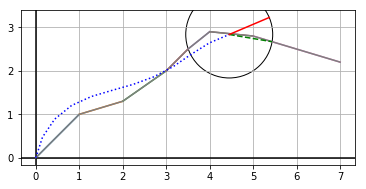

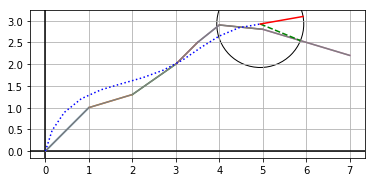

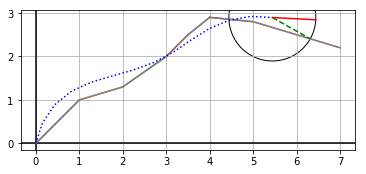

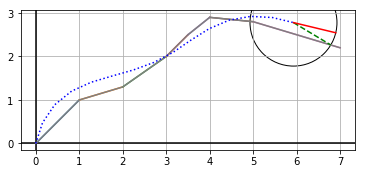

In [59]:
# угол между векторами со знаком
# По часовой стрелке: -
def vec_angle(v1, v2):
    return atan2(v2[1], v2[0]) - atan2(v1[1], v1[0])

# находит пересечение, угол на который меньше всего отличатеся от текущего курса
def find_closest_intersect(pos, bearing, intersects):    
    return  min(map(lambda x: (x, vec_angle(bearing, x - pos)), intersects), key=lambda x: abs(x[1]))

# поворачивает вектор на угол
def rotate_vec(vec, angle):
    M = np.array([[cos(angle), -sin(angle)],
                  [sin(angle), cos(angle)]])
    
    return np.matmul(M, vec)


def draw(path, r, trajectory, pos, bearing, intersect):
    init_plot()
    plt.plot(path[:,0], path[:,1])
    plt.plot(trajectory[:,0], trajectory[:,1], 'b:')
    circle(pos, r)
    line(pos, intersect, 'g--')
    line(pos, pos+bearing, 'r-')
    plt.show()

#######

path = np.array([[0, 0], [1,1], [2, 1.3], [3,2], [3.5,2.5], [4, 2.9], [5, 2.8], [7,2.2]])
r = 1

pos = np.array([0, 0])
bearing = np.array([0, 1])
max_ang_speed = 1
speed = 1
dt = 0.5
k = 0.8

trajectory = np.array([pos])

for _ in range(15):
    
    intersects = find_path_intersections(path, pos, r, 0.01)
    if len(intersects) == 0:
        break
    
    closest = find_closest_intersect(pos, bearing, intersects)    
    trajectory = np.vstack((trajectory, pos))

    draw(path, r, trajectory, pos, bearing, closest[0])
    
    ang_speed = k * closest[1]
    if abs(ang_speed) > max_ang_speed:
        ang_speed = copysign(max_ang_speed, ang_speed)
        
    bearing = rotate_vec(bearing, ang_speed * dt)
    pos = pos + bearing * speed * dt
    

plt.show()

